In [4]:
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import os
from sys import float_info
import scipy.constants as constants
from matplotlib.ticker import FormatStrFormatter
print('finished import')

finished import


['processed']
20.0
processed\water_020K_dep1.txt
20.0
processed\water_020K_dep2.txt
20.0
processed\water_020K_dep3.txt
20.0
processed\water_020K_dep4.txt
20.0
processed\water_020K_dep5.txt
30.0
processed\water_030K_dep1.txt
30.0
processed\water_030K_dep2.txt
30.0
processed\water_030K_dep3.txt
30.0
processed\water_030K_dep4.txt
30.0
processed\water_030K_dep5.txt
40.0
processed\water_040K_dep1.txt
40.0
processed\water_040K_dep2.txt
40.0
processed\water_040K_dep3.txt
50.0
processed\water_050K_dep1.txt
50.0
processed\water_050K_dep2.txt
50.0
processed\water_050K_dep3.txt
50.0
processed\water_050K_dep4.txt
50.0
processed\water_050K_dep5.txt
60.0
processed\water_060K_dep1.txt
60.0
processed\water_060K_dep2.txt
60.0
processed\water_060K_dep3.txt


C:\Users\au302163\AppData\Local\Temp\ipykernel_35164\2476209692.py:114: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]}) # I am making a 2 x 1 row x column grid, when the first row is 3 times the height ofthe2nd


70.0
processed\water_070K_dep1.txt
70.0
processed\water_070K_dep2.txt
70.0
processed\water_070K_dep3.txt
70.0
processed\water_070K_dep4.txt
80.0
processed\water_080K_dep1.txt
80.0
processed\water_080K_dep2.txt
80.0
processed\water_080K_dep3.txt
80.0
processed\water_080K_dep4.txt
80.0
processed\water_080K_dep5.txt
90.0
processed\water_090K_dep1.txt
90.0
processed\water_090K_dep2.txt
90.0
processed\water_090K_dep3.txt
90.0
processed\water_090K_dep4.txt
90.0
processed\water_090K_dep5.txt
100.0
processed\water_100K_dep1.txt
100.0
processed\water_100K_dep2.txt
100.0
processed\water_100K_dep3.txt
110.0
processed\water_110K_dep1.txt
110.0
processed\water_110K_dep2.txt
110.0
processed\water_110K_dep3.txt
120.0
processed\water_120K_dep1.txt
120.0
processed\water_120K_dep2.txt
120.0
processed\water_120K_dep3.txt
120.0
processed\water_120K_dep4.txt
125.0
processed\water_125K_dep1.txt
125.0
processed\water_125K_dep2.txt
125.0
processed\water_125K_dep3.txt
127.5
processed\water_127-5K_dep1.txt
127.

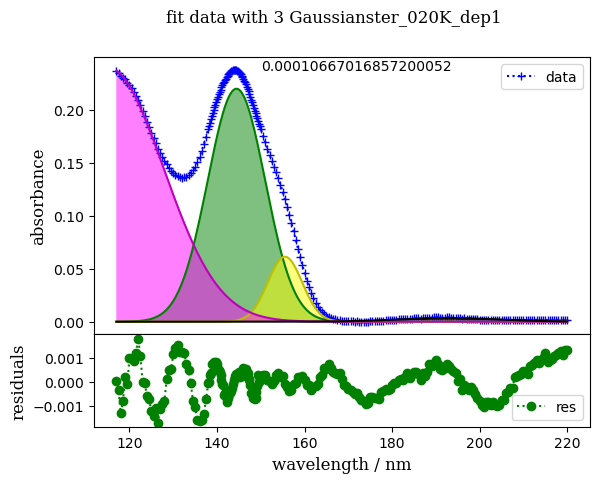

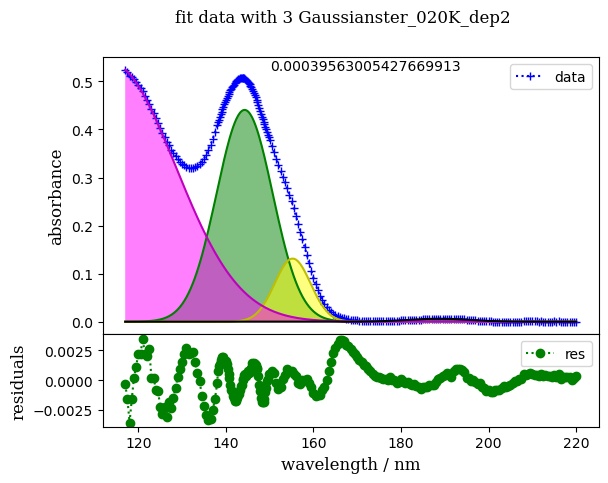

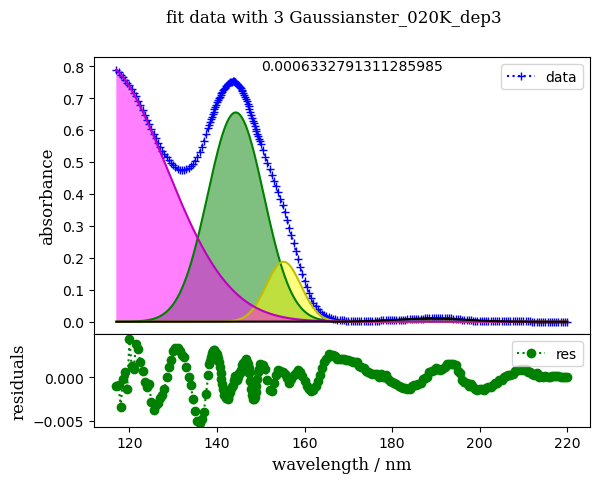

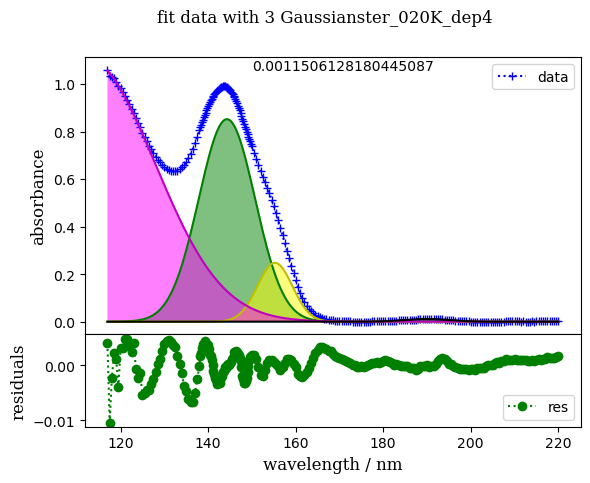

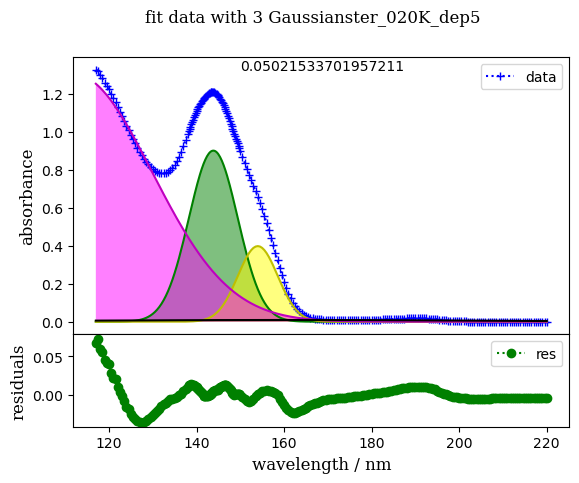

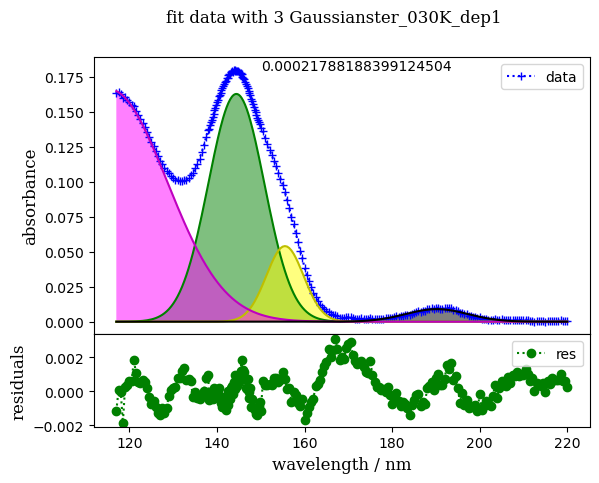

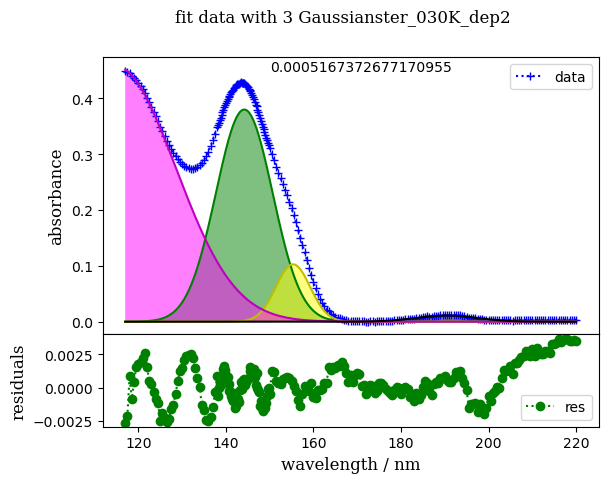

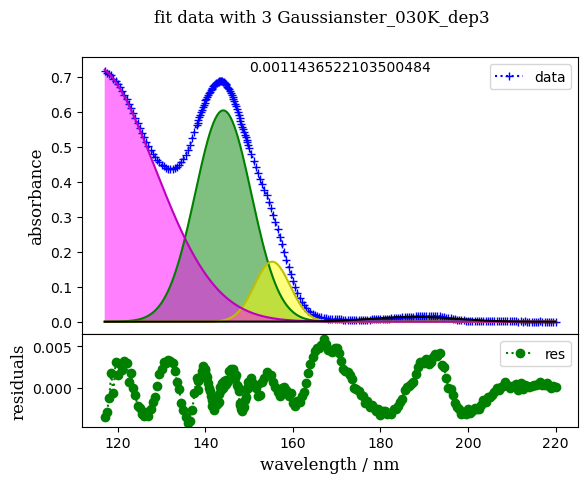

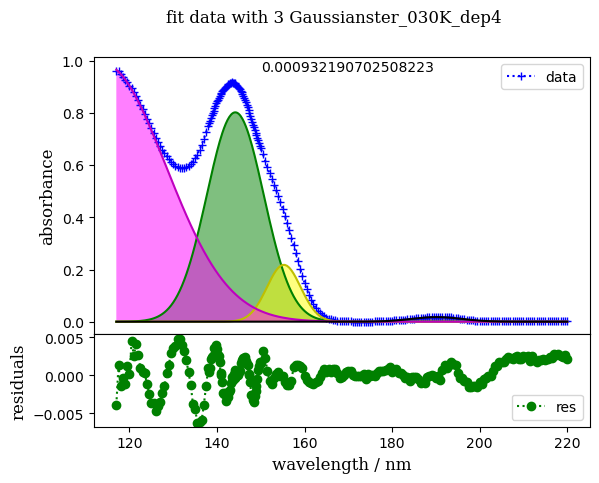

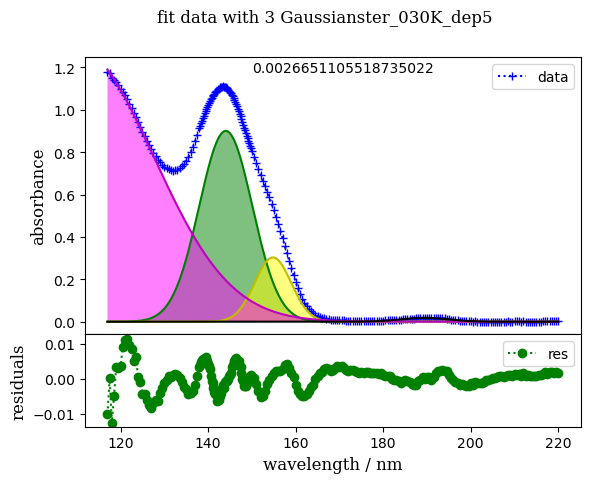

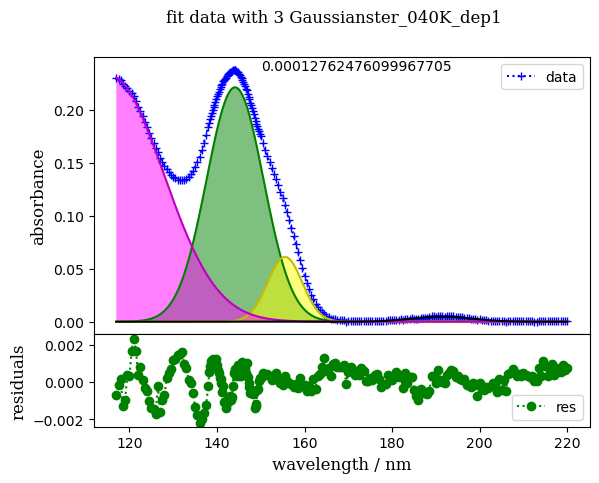

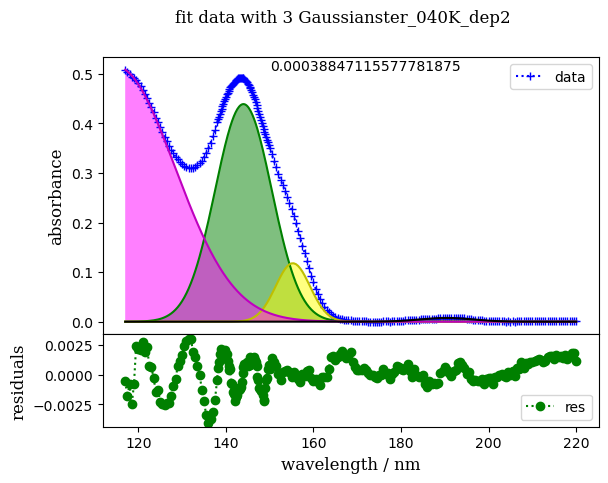

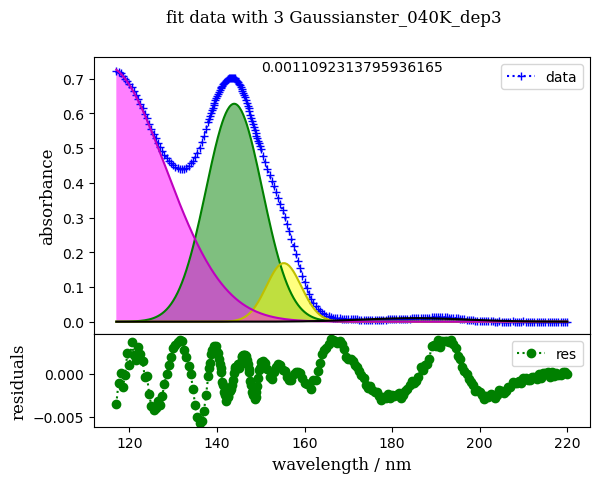

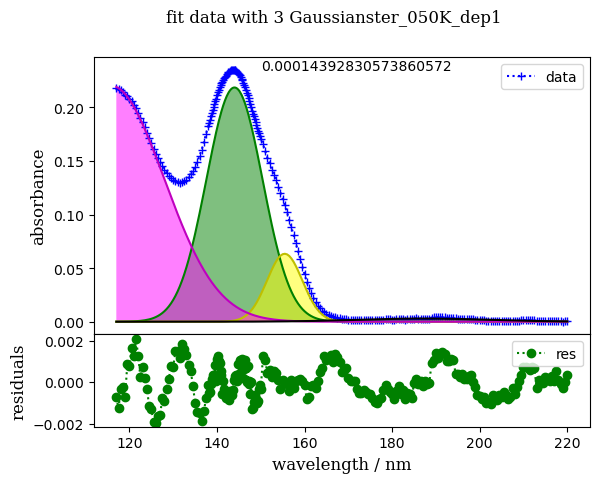

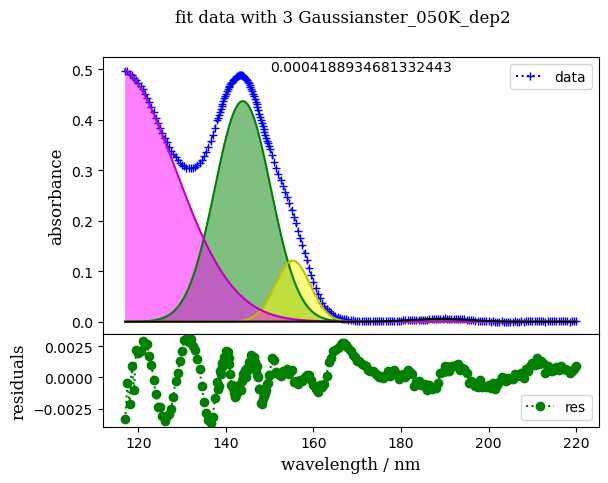

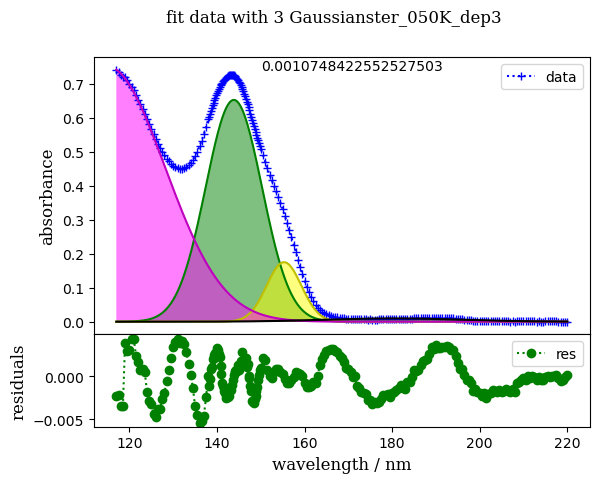

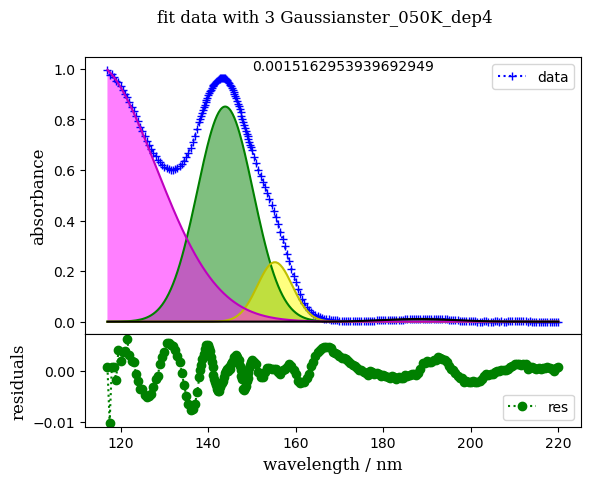

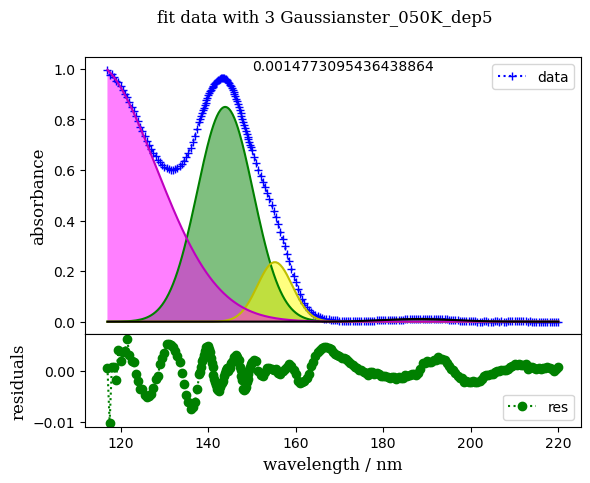

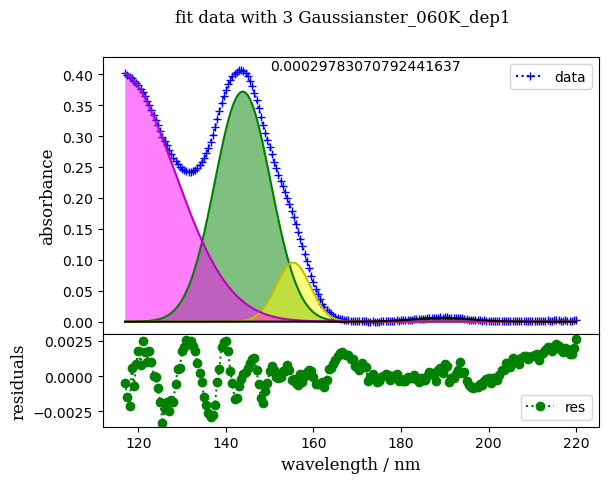

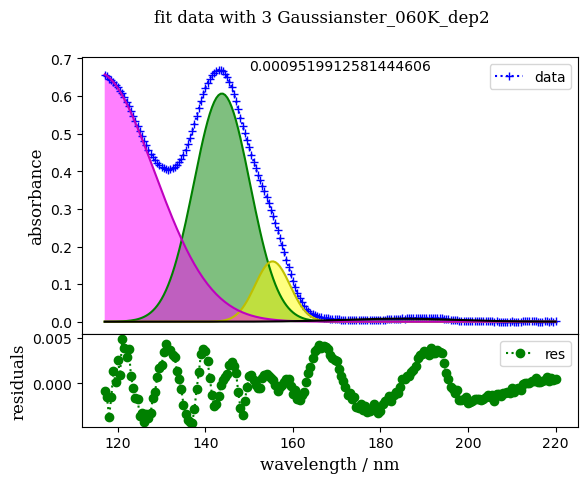

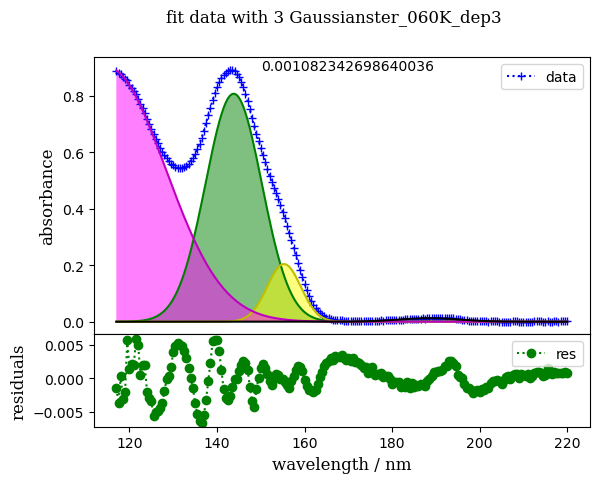

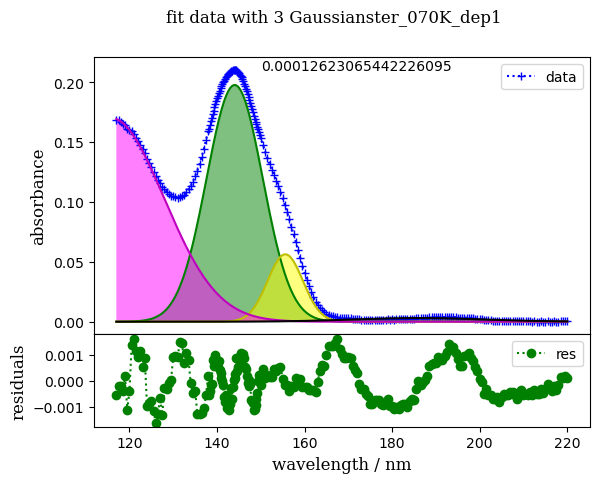

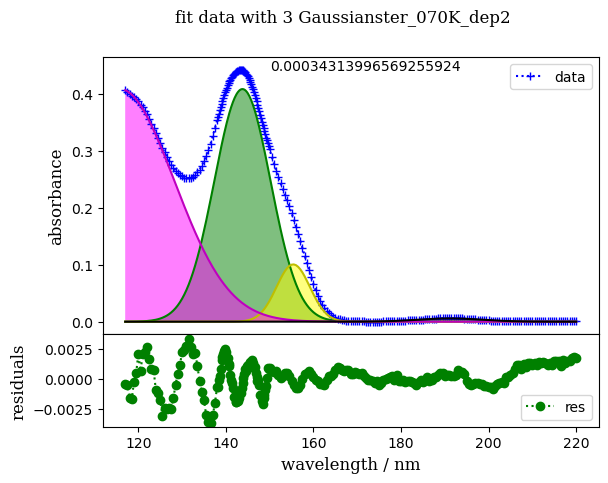

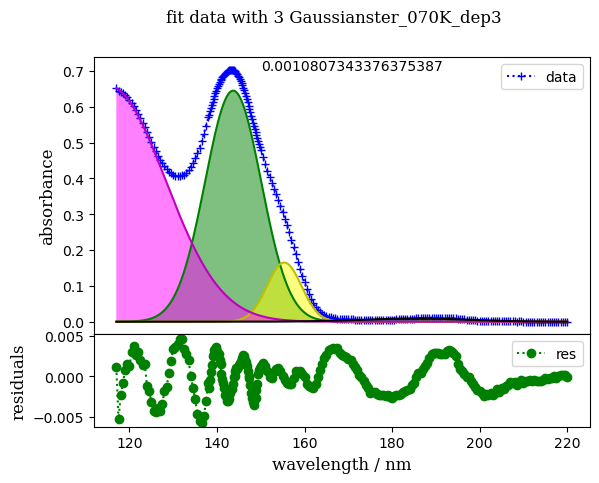

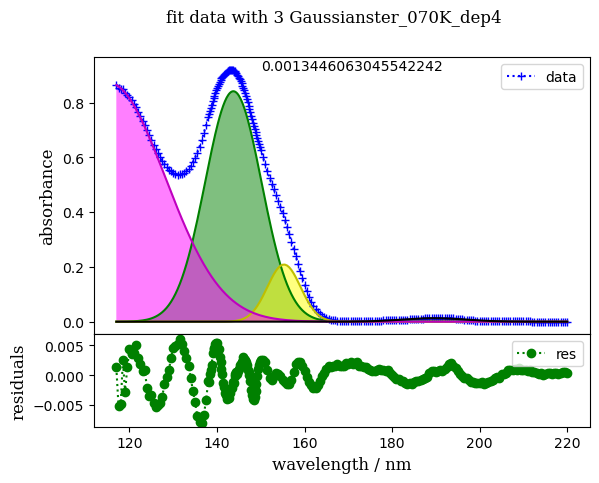

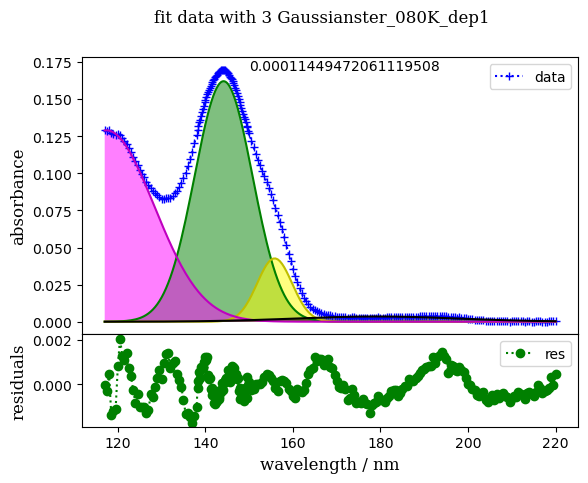

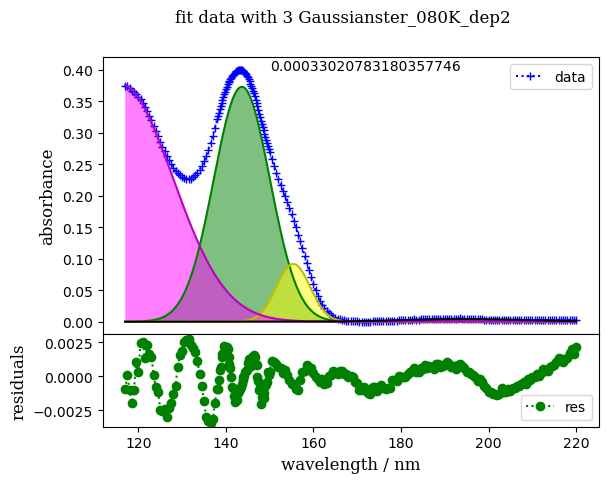

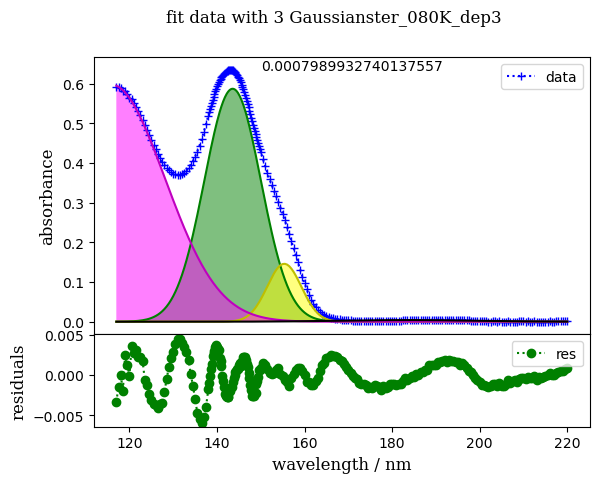

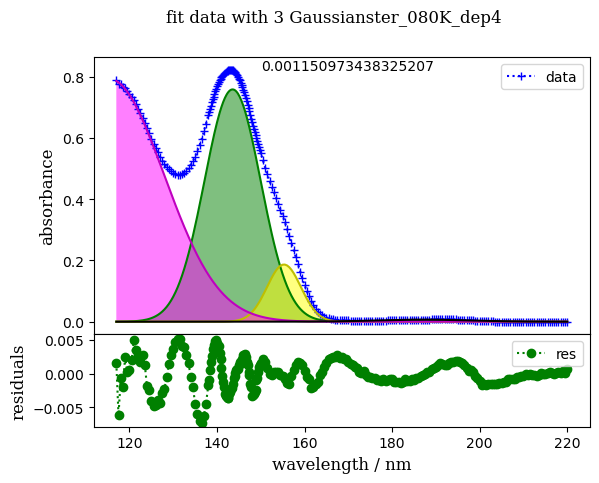

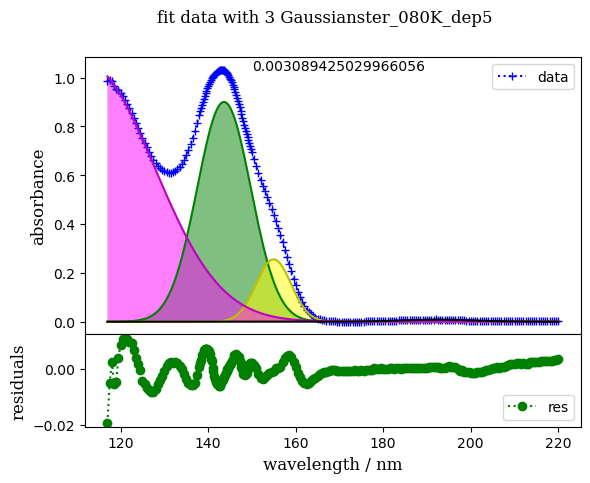

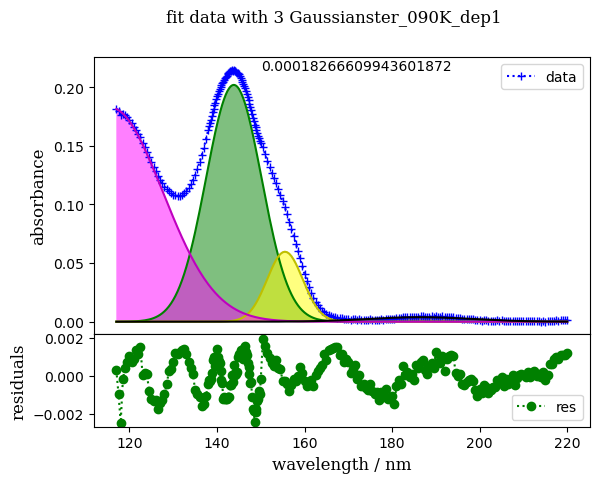

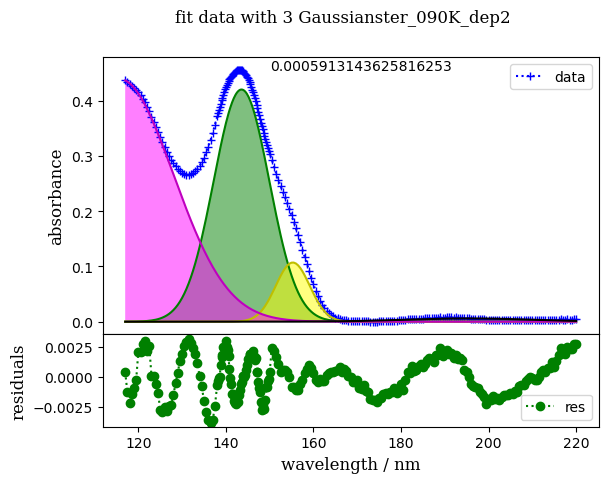

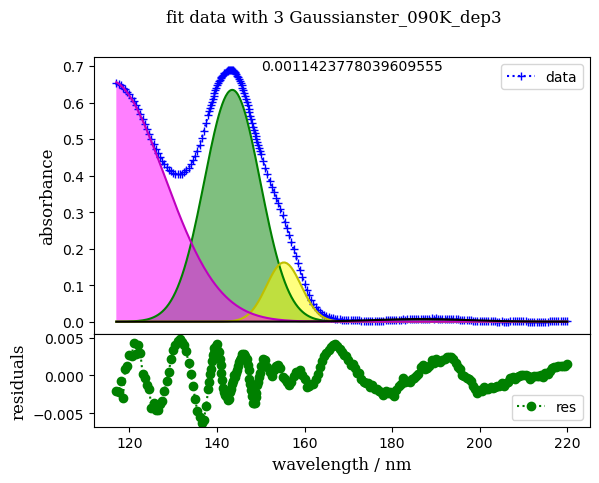

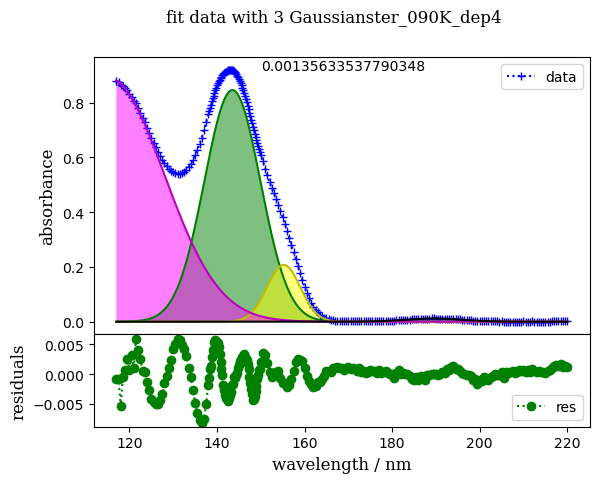

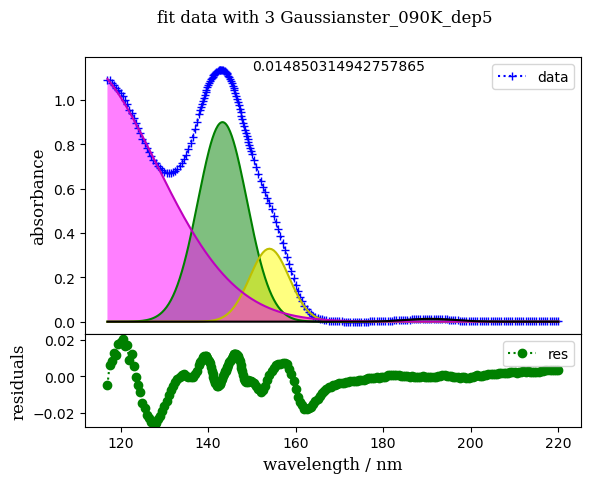

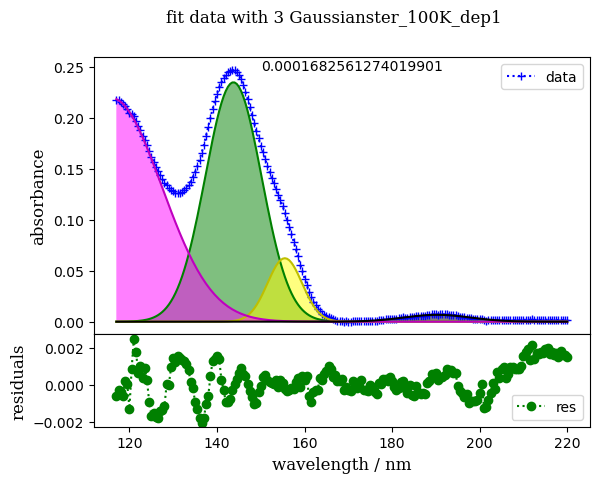

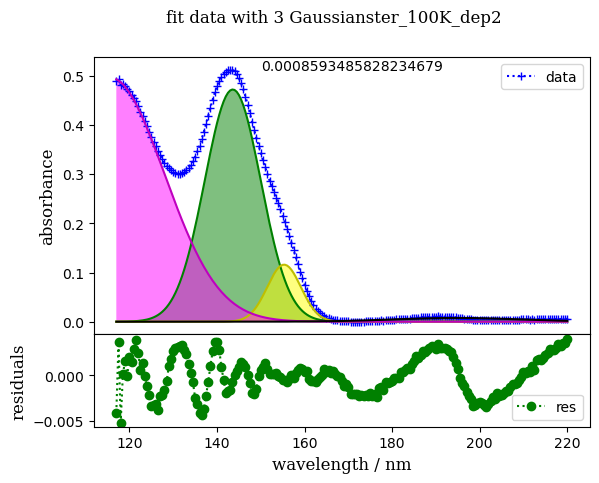

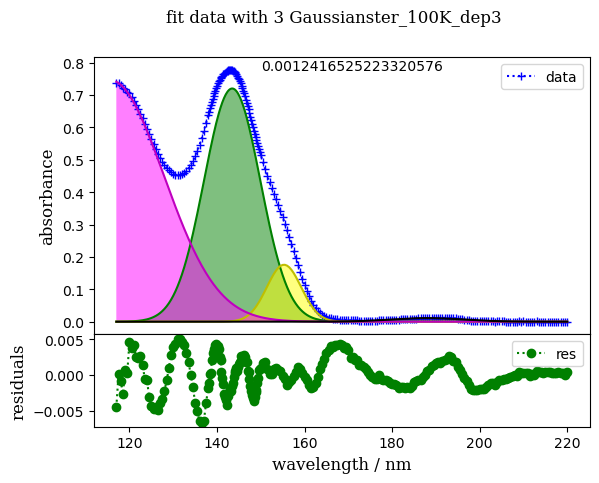

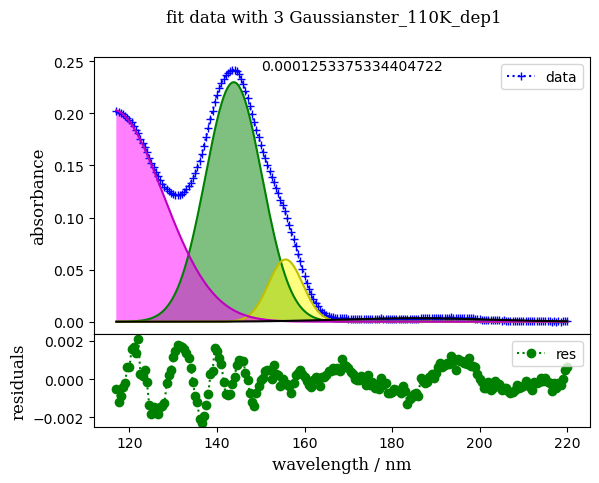

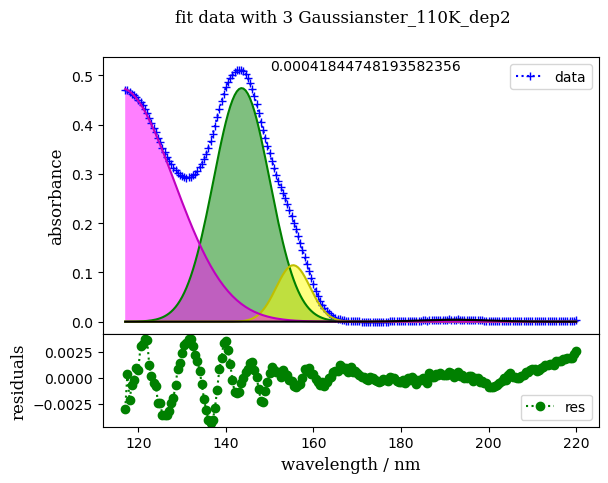

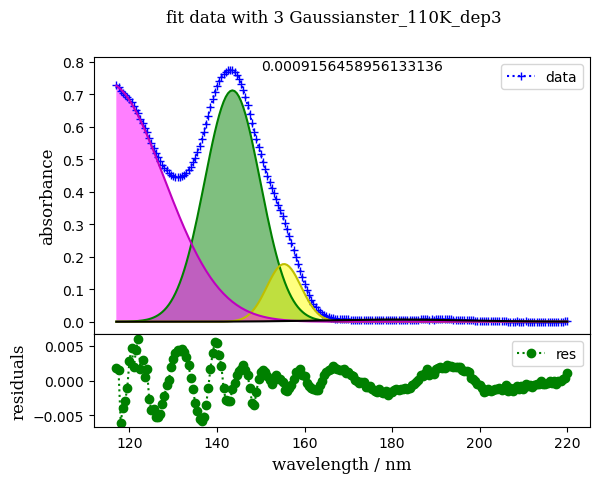

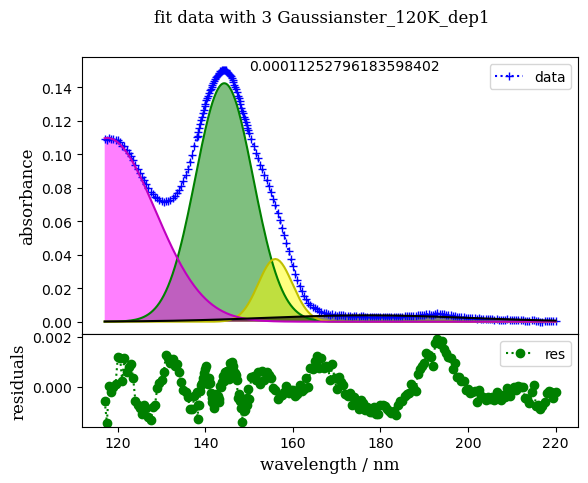

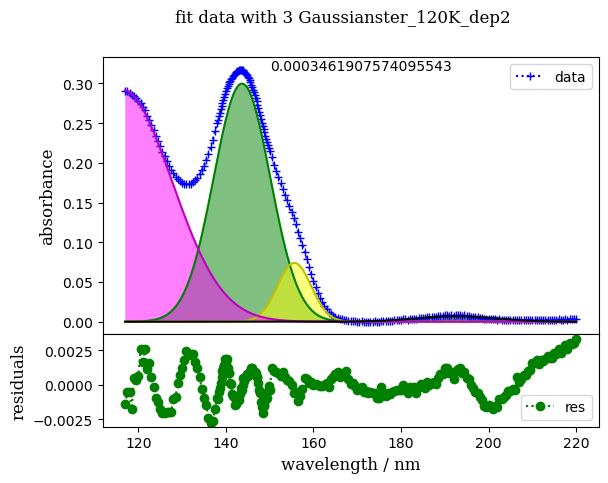

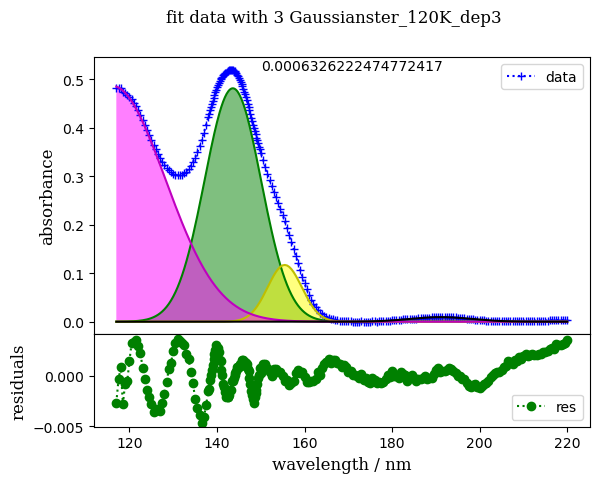

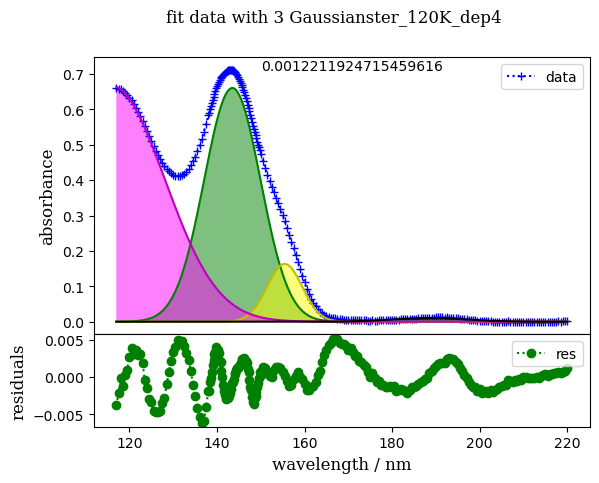

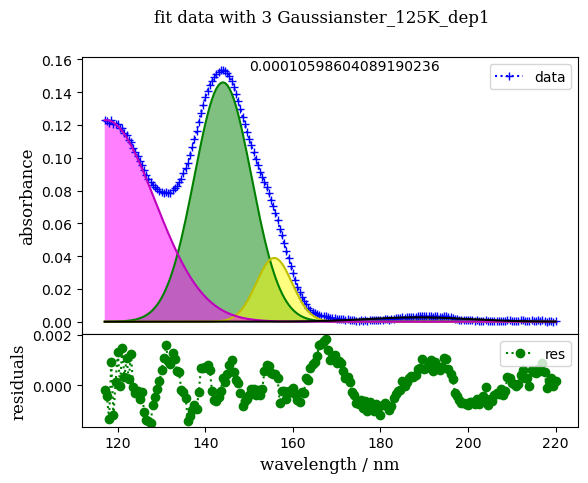

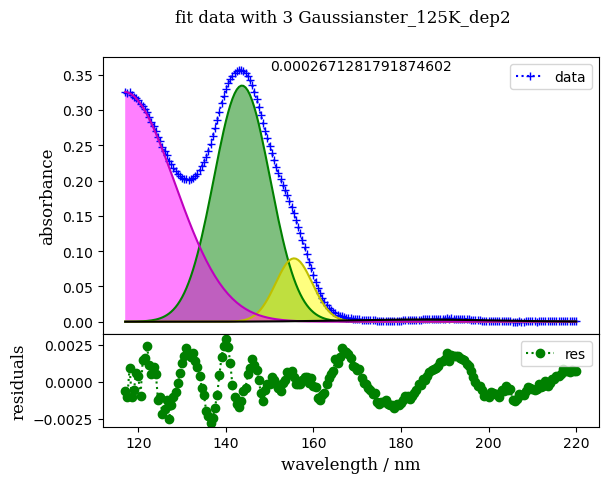

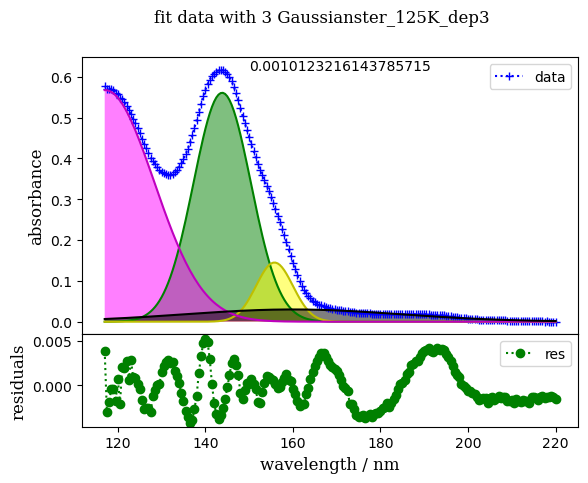

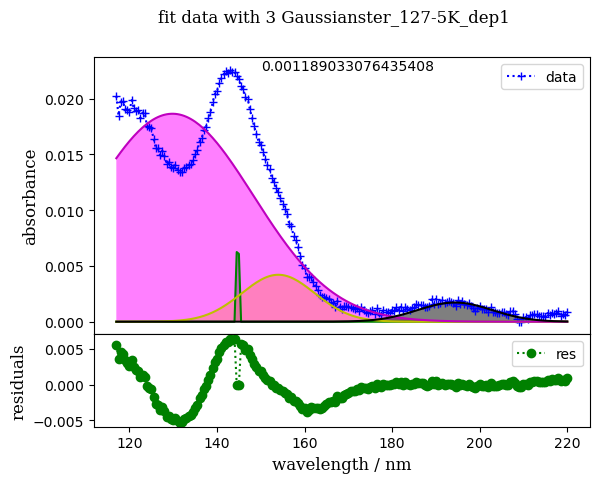

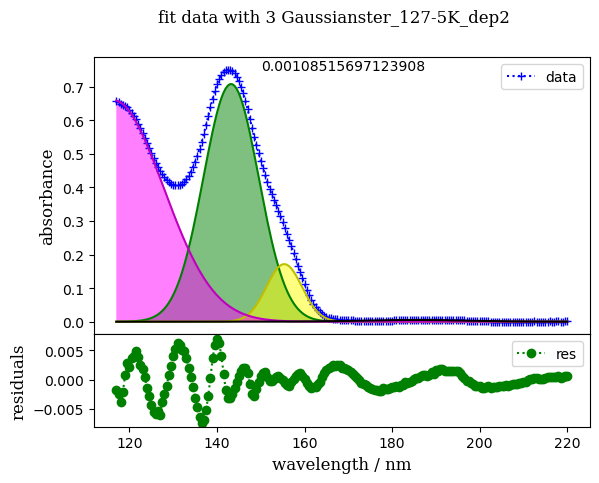

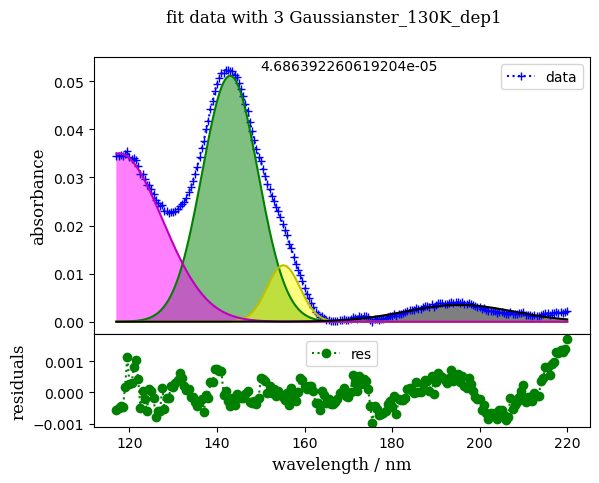

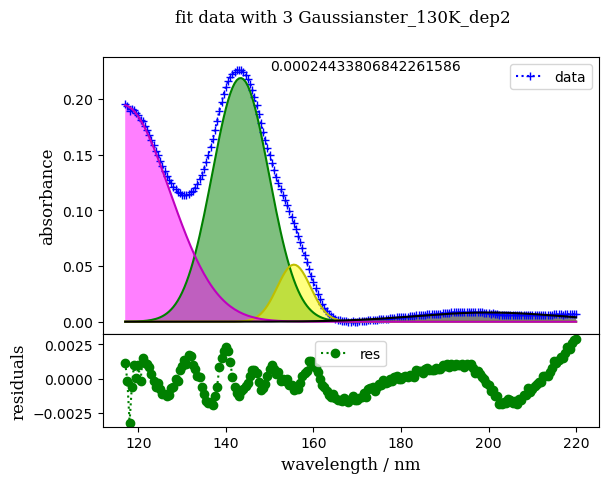

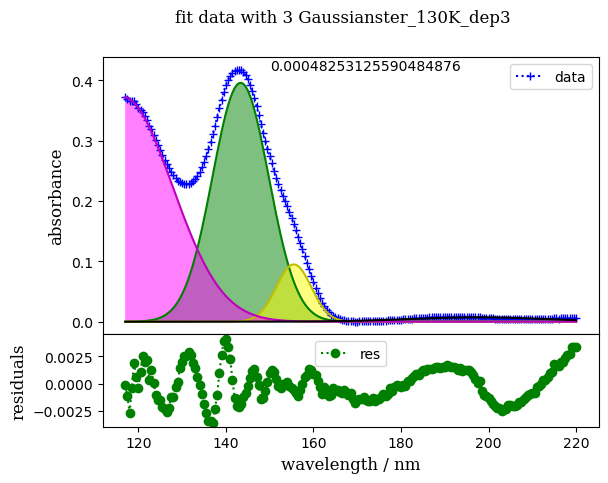

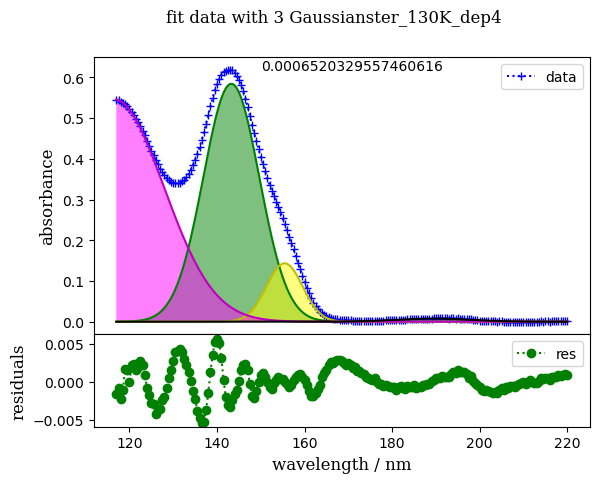

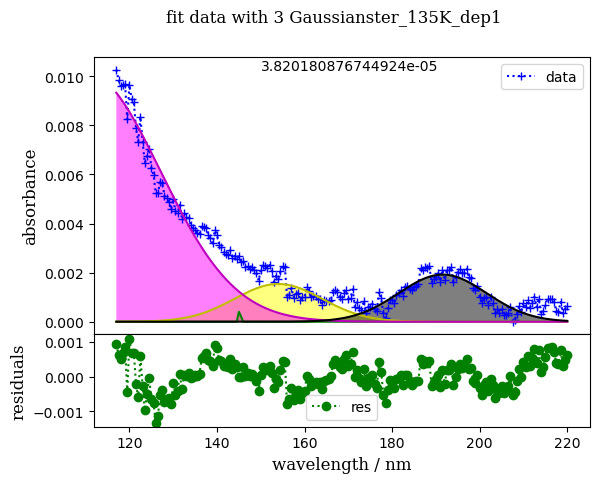

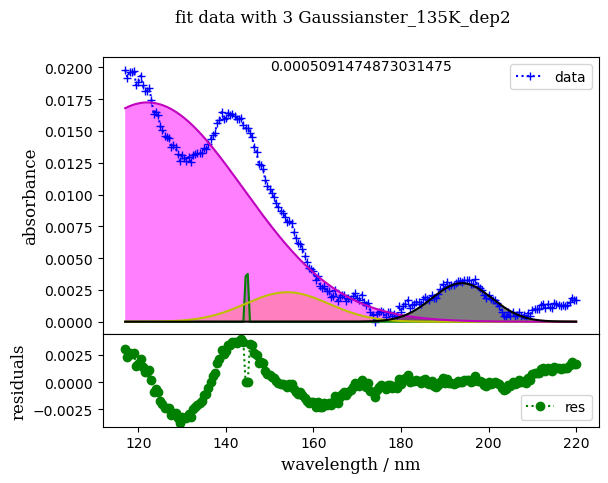

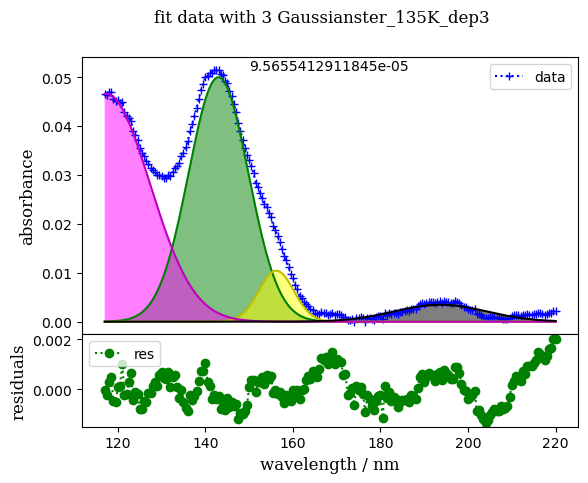

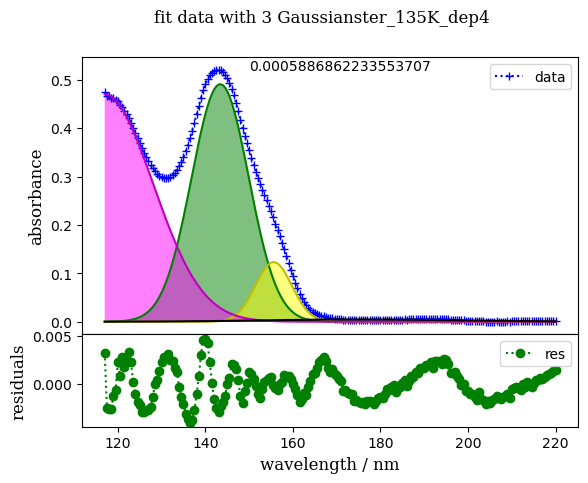

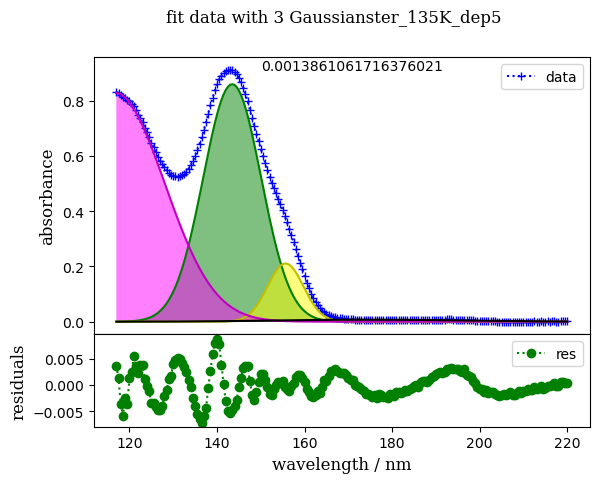

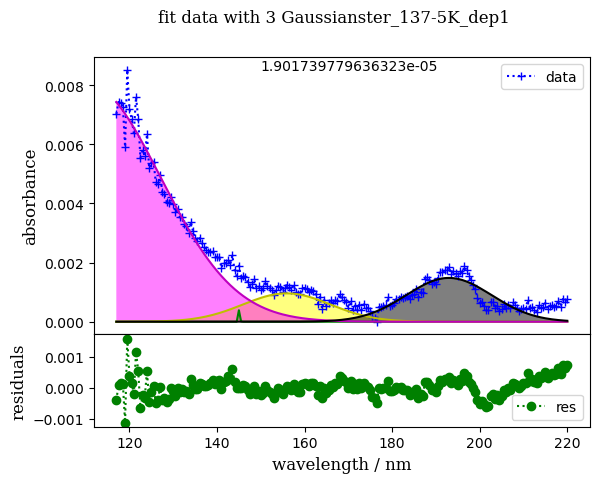

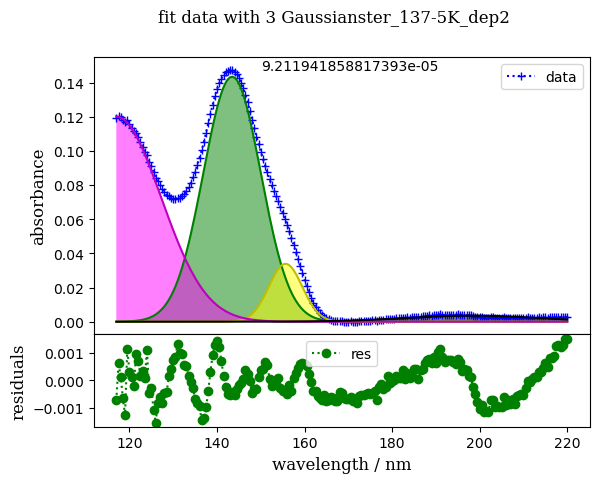

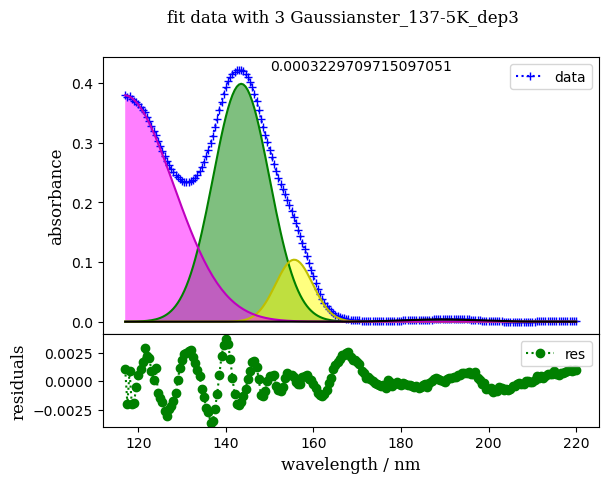

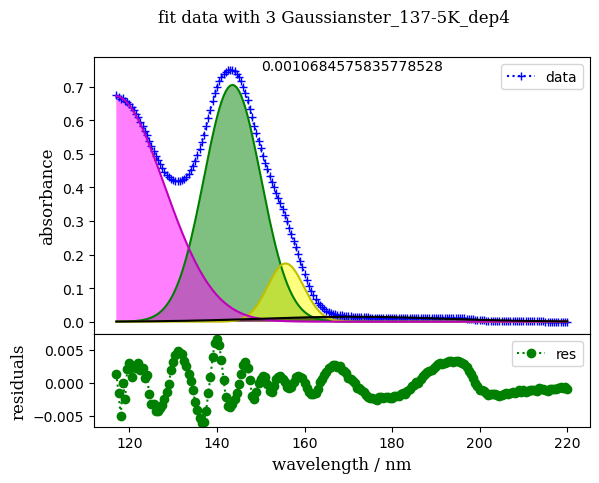

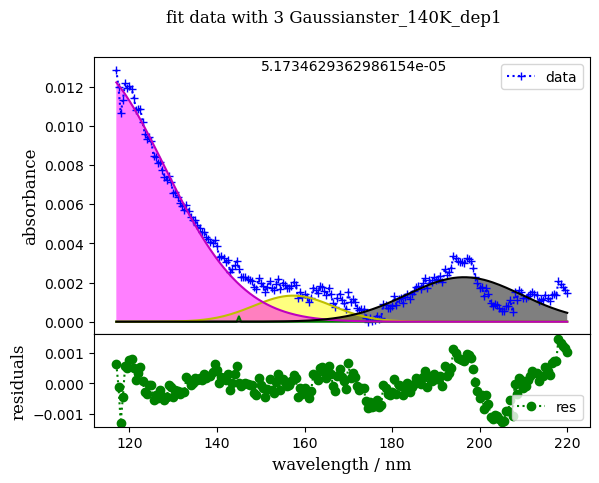

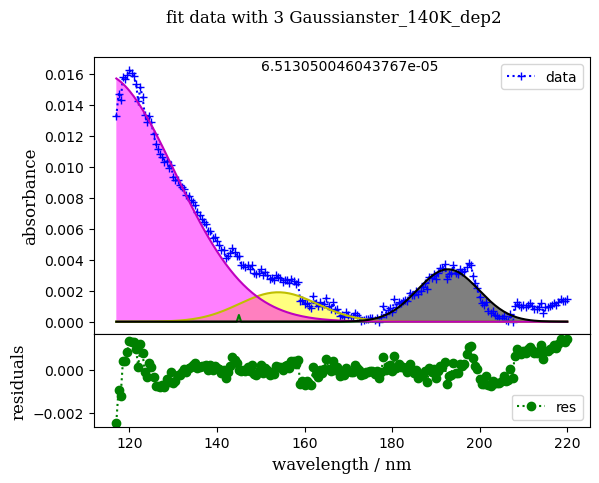

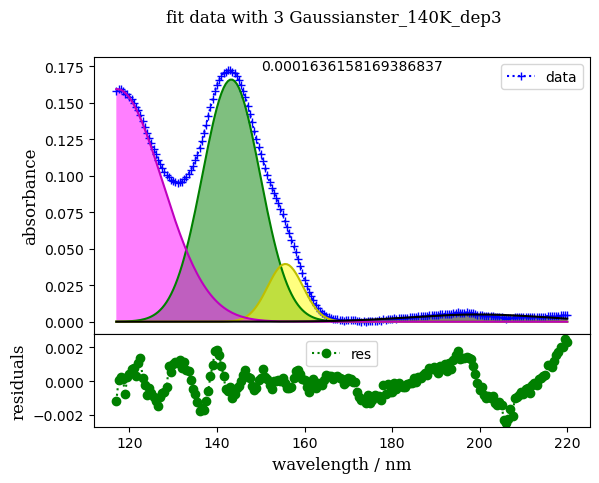

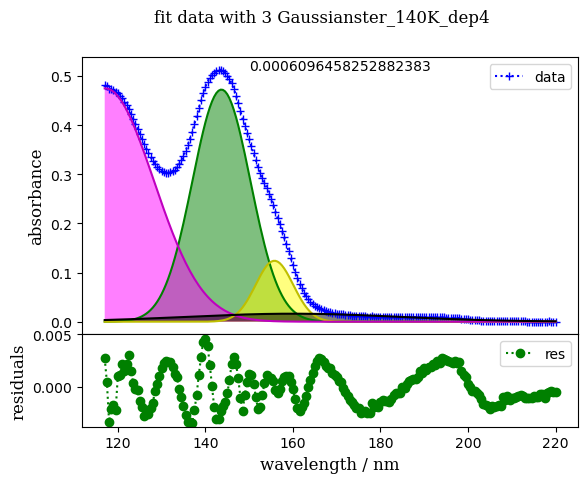

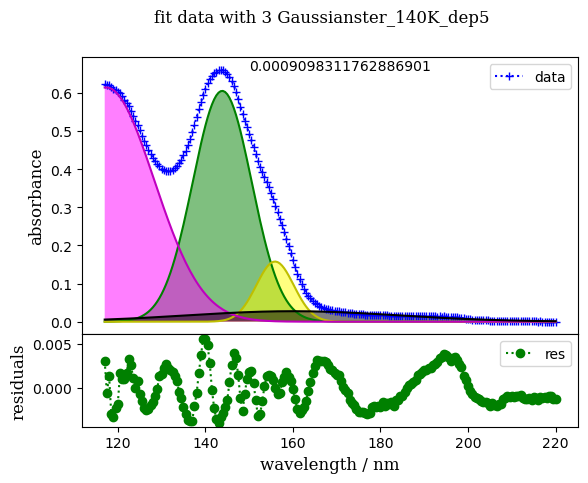

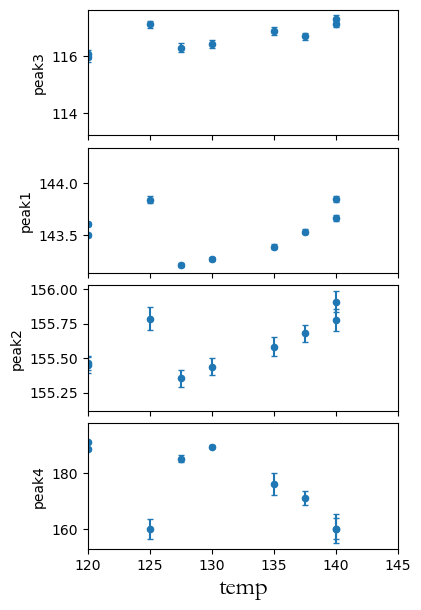

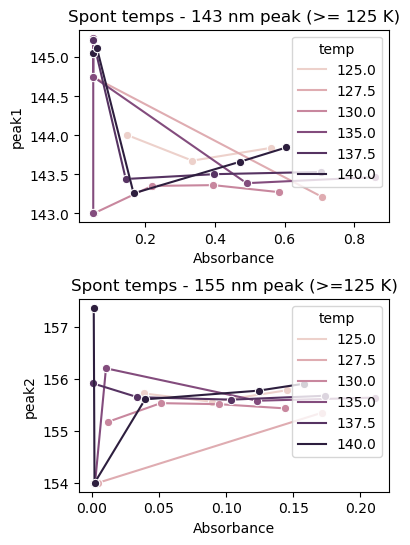

In [5]:
path = 'processed'
export_path='exports'

#   glob processed files
temperatures = glob.glob(path)
print(temperatures)

data_files = glob.glob('processed/***.txt')


#   Gaussian formula
def gaussian(x, A, x0, sig):
    return A*np.exp(-(x-x0)**2/(2*sig**2))

def multi_gaussian(x, *pars):
    g1 = gaussian(x, pars[0], pars[1], pars[2])
    g2 = gaussian(x, pars[3], pars[4], pars[5])
    g3 = gaussian(x, pars[6], pars[7], pars[8])
    g4 = gaussian(x, pars[9], pars[10], pars[11])
    # return g1 + g2 + g3 
    return g1 + g2 + g3 + g4

#   initial guess with bounds
init_vals = [0.2, 144,5,
         0.03, 155, 1,
         0.3, 120, 20,
         0.05, 180, 15]

bounds_min = [0.05,143,0,
              0,154,0,
              0,110,10,
              0,160,5]

bounds_max = [0.9,150,15,
              0.4,170,10,
              1.3,130,30,
              0.5,200,45]

#   create lists for data, temp & deposition
data_dict=[]
temp = []
depo = []


#   Load files and fit

for i in data_files:
    
    #   find temperature from data file name
    temperature = int(i[16:19])
    
    #   adjust for file naming - i.e. add  0.5 K to 127.5 and 137.5 K
    temperature = np.where((temperature==127 or temperature==137) , temperature+0.5, temperature)
    print(temperature)

    #   load data in datafram
    df = pd.read_csv(i, delimiter=' ', names=['wavelength', 'absorbance'])
    print(i)
   
    #   find data file name
    name = i[12:-4]

    #   find deposition number from file name
    d = i.find('dep')
    deposition = int(i[d+3])

    #   discard data below 117 nm and above 220 nm
    df = df.drop(df[df['wavelength']<117].index)


    #   set a linear background by finding the minimum point on the curve and drawing a linear line here
    linear_BkGd=df['absorbance'].min()
    #   substract bkg
    y = df['absorbance_bk'] = df['absorbance'] - linear_BkGd  
    # #make shorthand for wavelength
    x= df['wavelength']

    #   fit Gaussian
    popt, pcov = curve_fit(multi_gaussian, x, df['absorbance_bk'], p0=init_vals, bounds=(bounds_min,bounds_max))
    
    perr_3gauss = np.sqrt(np.diag(pcov))

    pars_1 = popt[0:3]
    pars_2 = popt[3:6]
    pars_3 = popt[6:9]
    pars_4 = popt[9:12]
    gauss_peak_1 = gaussian(x, *pars_1)
    gauss_peak_2 = gaussian(x, *pars_2)
    gauss_peak_3 = gaussian(x, *pars_3)
    gauss_peak_4 = gaussian(x, *pars_4)
    
    # #calculate errors and residuals:
    df['residual_3gauss']=residual_2gauss = y - (multi_gaussian(x, *popt))

    residuals=sum((df['absorbance_bk']-(multi_gaussian(df['wavelength'], *popt)))**2)

    #   fit parameters
    #---------------------
    pars_err_1 = perr_3gauss[0:3] # divide the output parameteres into to arrays, one for the first Gaussian; a 2nd for Gaussian 2; etc
    pars_err_2 = perr_3gauss[3:6]
    pars_err_3 = perr_3gauss[6:9]
    pars_err_4 = perr_3gauss[9:12]
    
    #   Concatenate fits
    Gauss = np.concatenate((pars_1, pars_err_1, pars_2, pars_err_2, pars_3, pars_err_3, pars_4, pars_err_4))

    #   Append Gaus, Temp and Dep to respective lists
    data_dict.append(Gauss)
    temp.append(temperature)
    depo.append(deposition)


    # plot each fit, file by file
    fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios':[3,1]}) # I am making a 2 x 1 row x column grid, when the first row is 3 times the height ofthe2nd
    fig.subplots_adjust(hspace=0) # Remove horizontal space between axes

    fig.suptitle('fit data with 3 Gaussians'+name, family="serif", fontsize=12)
    plt.xlabel('wavelength / nm', family="serif", fontsize=12)

    axs[1].plot(x,df['residual_3gauss'],'go:',label='res')

    axs[1].set_ylabel("residuals",family="serif", fontsize=12)  
    axs[0].plot(x,df['absorbance_bk'],'b+:',label='data')

    axs[0].plot(x, gauss_peak_1, "g")
    axs[0].fill_between(x, gauss_peak_1.min(), gauss_peak_1, facecolor="green", alpha=0.5)

    axs[0].set_ylabel("absorbance",family="serif", fontsize=12)    
    axs[0].plot(x,  gauss_peak_2, "y")
    axs[0].fill_between(x, gauss_peak_2.min(), gauss_peak_2, facecolor="yellow", alpha=0.5)  

    axs[0].plot(x,  gauss_peak_3, "m")
    axs[0].fill_between(x, gauss_peak_3.min(), gauss_peak_3, facecolor="magenta", alpha=0.5)  

    axs[0].plot(x,  gauss_peak_4, "k")
    axs[0].fill_between(x, gauss_peak_4.min(), gauss_peak_4, facecolor="k", alpha=0.5)  

    axs[0].annotate(residuals, xy =(150, max(df['absorbance_bk'])))

    axs[1].legend()
    axs[0].legend()


    #plt.show() #This command would plot a different graph for each f during the cycling

    # Save the dataframe to csv file
    
    df.to_csv('exports/'+name+'.csv', index=False)


data_dict = np.array(data_dict)
temp = np.array(temp)
depo = np.array(depo)
data = np.round(np.concatenate((temp[:,None], depo[:,None],data_dict), axis=1),8)



data_dict=dict(enumerate(data,0))




#    plot gaussian peak max as a function of temperatue
#--------------------------------------------------------

fig, axs = plt.subplots(4, 1, sharex=True, figsize=(4,7)) # I am making a 4 x 1 row x column grid
fig.subplots_adjust(hspace=0.1)
plt.xlabel('temperature / K', family="garamond", fontsize=18)

#ax.errorbar(x, z, markersize=10, xerr=sigx, yerr=sigy, fmt='.', color='red', label='observed')
# axs[0].errorbar(all_temp, Gauss_top_pos, yerr=None, xerr = None , fmt='bo', label='Peak 1')

p = pd.DataFrame(data, columns=['temp','dep',
                                'ab1','peak1','sig1','ab1_er','peak1_er','sig1_er',
                                'ab2','peak2','sig2','ab2_er','peak2_er','sig2_er',
                                'ab3','peak3','sig3','ab3_er','peak3_er','sig3_er',
                                'ab4','peak4','sig4','ab4_er','peak4_er','sig4_er'])

plt.rcParams['errorbar.capsize']=2
#   115 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak1', yerr = 'peak1_er', ax=axs[1])
#   144 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak2', yerr = 'peak2_er',ax=axs[2])
#   155 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak3', yerr = 'peak3_er',ax=axs[0])
#   190 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak4', yerr = 'peak4_er',ax=axs[3])
plt.xlim(120,145)

plt.show()

# # #save to text file
p.to_csv('gaussian_fits.csv', index=False)


#   plot spont and nonspont Gauss peak as function of absorbance
#----------------------------------------------------------------------
fig, axs = plt.subplots(2, 1, sharex=False, figsize=(4,6)) # I am making a 2 x 1 row x column grid
fig.subplots_adjust(hspace=0.4)

#   144 nm peak
sns.lineplot(data=p.loc[p.temp>=125], x='ab1',y='peak1', marker='o', hue='temp', ax=axs[0])
#   155 nm peak
sns.lineplot(data=p.loc[p.temp>=125], x='ab2',y='peak2', marker='o', hue='temp', ax=axs[1])

axs[0].set_xlabel('Absorbance')
axs[0].set_title('Spont temps - 143 nm peak (>= 125 K)')
axs[1].set_title('Spont temps - 155 nm peak (>=125 K)')
axs[1].set_xlabel('Absorbance')

plt.show()

obs_spont_data_143 = p.loc[(p['temp'] > 125) & (p['ab1'] > 0.47) & (p['ab1'] < 0.71), ['temp','peak1']]
obs_all_data_143 = p.loc[(p['ab1'] > 0.47) & (p['ab1'] < 0.71), ['temp','peak1']]
obs_spont_data_155 = p.loc[(p['temp'] > 125) & (p['ab1'] > 0.47) & (p['ab1'] < 0.71), ['temp','peak2']]
obs_all_data_155 = p.loc[(p['ab1'] > 0.47) & (p['ab1'] < 0.71), ['temp','peak2']]
np.savetxt("water_143 positions for Gauss2.txt", obs_spont_data_143, delimiter=' ', header='Temperature(K) PeakPosition(nm)', comments='') 
np.savetxt("water_155 positions for Gauss2.txt", obs_spont_data_155, delimiter=' ', header='Temperature(K) PeakPosition(nm)', comments='') 
np.savetxt("water_143 all positions for Gauss2.txt", obs_all_data_143, delimiter=' ', header='Temperature(K) PeakPosition(nm)', comments='') 
np.savetxt("water_155 all positions for Gauss2.txt", obs_all_data_155, delimiter=' ', header='Temperature(K) PeakPosition(nm)', comments='') 

NameError: name 'fit_polynomial_same_temp' is not defined

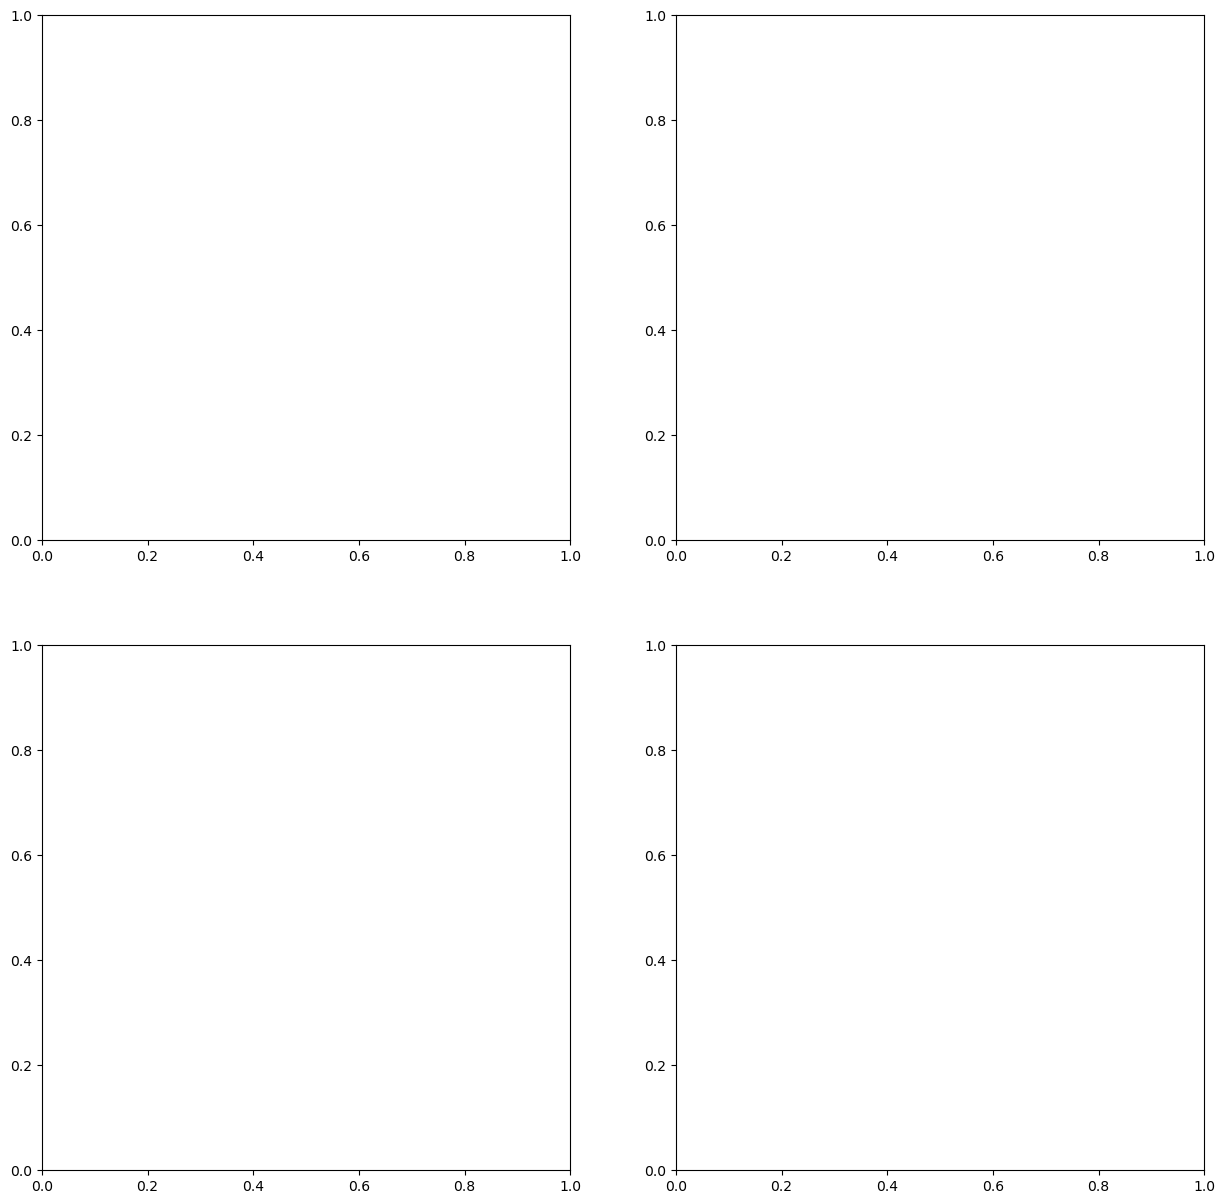

In [6]:
fig, axs = plt.subplots(2, 2, sharex=False, figsize=(15,15)) # I am making a 4 x 4 row x column grid
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.2)
       

p = pd.DataFrame(data, columns=['temp','dep',
                                'ab1','peak1','sig1','ab1_er','peak1_er','sig1_er',
                                'ab2','peak2','sig2','ab2_er','peak2_er','sig2_er',
                                'ab3','peak3','sig3','ab3_er','peak3_er','sig3_er',
                                'ab4','peak4','sig4','ab4_er','peak4_er','sig4_er'])

fit_polynomial_same_temp(p, 'ab2', 'peak2', 'temp', 2)


plt.rcParams['errorbar.capsize']=2
#   144 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak1', yerr = 'peak1_er', ax=axs[0,0])
#   155 nm peak
p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak2', yerr = 'peak2_er',ax=axs[0,1])
#   115 nm peak
#p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak3', yerr = 'peak3_er',ax=axs[0])
#   190 nm peak
#p.loc[(p.ab1>0.47) & (p.ab1<0.71)].plot.scatter(x='temp',y='peak4', yerr = 'peak4_er',ax=axs[3])
axs[0,0].set_xlim(10,142)
axs[0,1].set_xlim(10,142)
axs[0,0].set_ylim(143.1,144.3)
axs[0,0].set_title('143 nm peak', family="garamond", fontsize=18)
axs[0,1].set_title('155 nm peak', family="garamond", fontsize=18)
axs[0,0].set_xlabel('temperature / K', family="garamond", fontsize=18)
axs[0,1].set_xlabel('temperature / K', family="garamond", fontsize=18)
axs[0,1].set_ylabel('wavelength / nm', family="garamond", fontsize=18)
axs[0,0].set_ylabel('wavelength / nm', family="garamond", fontsize=18)


sns.lineplot(data=p.loc[p.temp<127], palette = "Set2", x='ab1',y='peak1', marker='o', hue='temp',  ax=axs[1,0])
#sns.lineplot(data=p, palette = "Set2", x='ab1',y='peak1', marker='o', hue='temp',  ax=axs[1,0])
#   155 nm peak
sns.lineplot(data=p.loc[p.temp<127], palette = "Set2", x='ab2',y='peak2', marker='o', hue='temp', ax=axs[1,1])
#sns.lineplot(data=p, palette = "Set2", x='ab2',y='peak2', marker='o', hue='temp', ax=axs[1,1])

axs[1,0].set_xlabel('Absorbance @ peak 143 nm', family="garamond", fontsize=18)
axs[1,0].set_ylabel('wavelength / nm', family="garamond", fontsize=18)
axs[1,0].set_title('absorbance plots', family="garamond", fontsize=18)
axs[1,1].set_xlabel('Absorbance @ peak 155 nm', family="garamond", fontsize=18)
axs[1,1].set_ylabel('wavelength / nm', family="garamond", fontsize=18)
axs[1,1].set_title('absorbance plots', family="garamond", fontsize=18)
axs[1,1].set_xlim(0.0,0.25)
axs[1,1].set_ylim(155.0,157.1)

axs[1,0].axvline(x = 0.46,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) 
axs[1,0].axvline(x = 0.72,    # Line on x = 2
           ymin = 0, # Bottom of the plot
           ymax = 1) 
#axs[1,1].axvline(x = 0.12,    # Line on x = 2
#           ymin = 0, # Bottom of the plot
#           ymax = 1) 
#axs[1,1].axvline(x = 0.18,    # Line on x = 2
#           ymin = 0, # Bottom of the plot
#           ymax = 1) 


#plt.show()

fig.savefig('water_spont_peaks.png')

C:\Users\au302163\AppData\Local\Temp\ipykernel_35164\2340904756.py:36: RankWarning: Polyfit may be poorly conditioned
  poly_data = fit_polynomial_same_temp(p, 'ab2', 'peak2', 'temp', 2)


       x_plot      y_plot   temp
0    0.000000  155.331455   20.0
1    0.000997  155.333893   20.0
2    0.001994  155.336301   20.0
3    0.002991  155.338681   20.0
4    0.003988  155.341033   20.0
..        ...         ...    ...
395  0.143618  155.772773  125.0
396  0.143982  155.775542  125.0
397  0.144346  155.778330  125.0
398  0.144709  155.781135  125.0
399  0.145073  155.783958  125.0

[4800 rows x 3 columns]


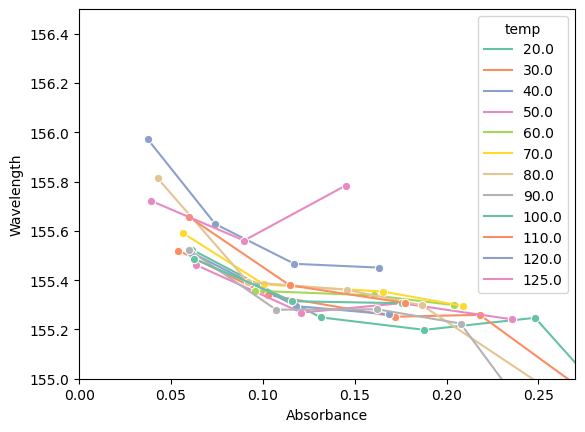

In [7]:


def fit_polynomial_same_temp(df, x_col, y_col, temp_col, order):
    poly_data = pd.DataFrame()
    # Group the DataFrame by the temperature column and iterate over each group
    for temp, group in df.groupby(temp_col):
        
        # Extract the x and y data
        x_data = group[x_col]
        y_data = group[y_col]
        
        # Fit the polynomial
        coefficients = np.polyfit(x_data, y_data, order)

        # Create the polynomial function
        polynomial_func = np.poly1d(coefficients)
        
        # Print the polynomial function for this temperature
        #print(f"Polynomial function for {temp_col}={temp}:")
        #print(polynomial_func)
        #print("\n")
        
        # Generate x values for the plot
        x_plot = np.linspace(0, max(x_data), 400)

        # Compute y values for the plot
        y_plot = polynomial_func(x_plot)
        
        temp_data = pd.DataFrame({
            'x_plot': x_plot,
            'y_plot': y_plot,
            'temp': temp
        })
        poly_data = pd.concat([poly_data, temp_data])

    return poly_data

poly_data = fit_polynomial_same_temp(p, 'ab2', 'peak2', 'temp', 2)

print(poly_data.loc[poly_data.temp<127])

#fig, axs = plt.subplots(2, 1, sharex=False, figsize=(4,6)) # I am making a 2 x 1 row x column grid
#fig.subplots_adjust(hspace=0.4)

poly_data_reset = poly_data.reset_index()
#sns.lineplot(data=poly_data_reset.loc[poly_data_reset.temp<125], palette = "Set2",x='x_plot', y='y_plot',hue='temp')
sns.lineplot(data=p.loc[p.temp<127], palette = "Set2", x='ab2',y='peak2', marker='o', hue='temp')

# Set x and y axis limits
plt.xlim(0, 0.27)
plt.ylim(155, 156.5)

# Set x and y axis labels
plt.xlabel('Absorbance')
plt.ylabel('Wavelength')

# Show the plot
plt.show()



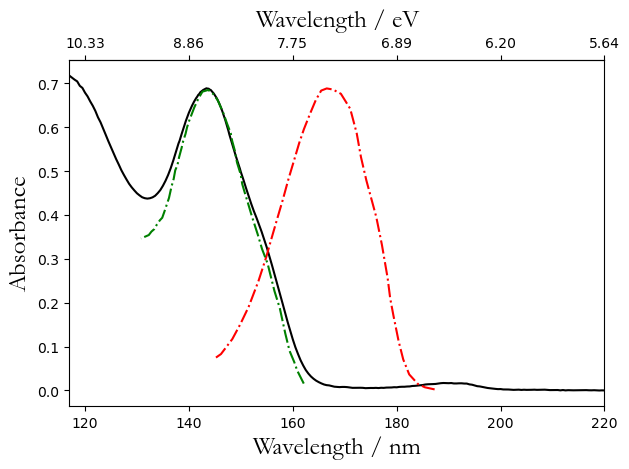

In [15]:
#plot selected spectra
Temp_to_plot = ('030K') #e.g., 100K, 020K  - alwyas three digits (no space!) You can plot two different temperatures
Dep_to_plot = ('3') #e.g., '2' just number
gas_shift = 0#23.5 # in nm
kobayashi_shift = 0 # in nm

File_name1 = ('ter_'+(Temp_to_plot)+'_dep'+(Dep_to_plot))

file1_to_plot = pd.read_csv('exports/'+File_name1+'.csv',header=[0])#,delimiter=r"\s+")
water_gas_phase = pd.read_csv('water_gas_phase.csv', header= [0])
water_kobayashi = pd.read_csv('water_kobayashi.csv', header= [0])

water_gas_phase['wavelength'] = 1239.8/water_gas_phase['x']
water_gas_phase['wavelength_shift'] = water_gas_phase['wavelength'] - gas_shift
water_gas_phase['absorbance'] = (water_gas_phase.iloc[:, 1]) / 7.5

water_kobayashi['wavelength'] = 1239.8/water_kobayashi['x']
water_kobayashi['wavelength_shift'] = water_kobayashi['wavelength'] - kobayashi_shift
water_kobayashi['absorbance'] = (water_kobayashi.iloc[:, 1]) / 4

# Function to prevent zero values in an array
def preventDivisionByZero(some_array):
    corrected_array = some_array.copy()
    for i, entry in enumerate(some_array):
        # If element is zero, set to some small value
        if abs(entry) < float_info.epsilon:
            corrected_array[i] = float_info.epsilon
    
    return corrected_array

# Converting wavelength (nm) to energy (eV)
def WLtoE(wl):
    # Prevent division by zero error
    wl = preventDivisionByZero(wl)

    # E = h*c/wl            
    h = constants.h         # Planck constant
    c = constants.c         # Speed of light
    J_eV = constants.e      # Joule-electronvolt relationship
    
    wl_nm = wl * 10**(-9)   # convert wl from nm to m
    E_J = (h*c) / wl_nm     # energy in units of J
    E_eV = E_J / J_eV       # energy in units of eV
    
    return E_eV  

# Converting energy (eV) to wavelength (nm)
def EtoWL(E):
    # Prevent division by zero error
    E = preventDivisionByZero(E)
    
    # Calculates the wavelength in nm
    return constants.h * constants.c / (constants.e * E) * 10**9

fig, ax1 = plt.subplots()

ax1.plot(file1_to_plot['wavelength'], file1_to_plot['absorbance_bk'],'k-', label='Rachels data')
ax1.plot(water_gas_phase['wavelength_shift'], water_gas_phase['absorbance'], 'r-.', label='gas_phase shifted')
ax1.plot(water_kobayashi['wavelength_shift'], water_kobayashi['absorbance'], 'g-.', label='kobayashi_amorphous')

ax1.set_ylabel('Absorbance',family="garamond", fontsize=18)
ax1.set_xlabel('Wavelength / nm',family="garamond", fontsize=18)
#plt.ylim(0,0.8)
ax1.set_xlim(117,220)
#ax1.axvline(x = 143,    
#           ymin = 0, # Bottom of the plot
#           ymax = 1) 
#ax1.axvline(x = 155,    
#           ymin = 0, # Bottom of the plot
#           ymax = 1) 

# Create the second x-axis on which the energy in eV will be displayed
ax2 = ax1.secondary_xaxis('top', functions=(WLtoE, EtoWL))
ax2.set_xlabel('Wavelength / eV',family="garamond", fontsize=18, labelpad=7)

# Get ticks from ax1 (wavelengths)
wl_ticks = ax1.get_xticks()
wl_ticks = preventDivisionByZero(wl_ticks)

# Based on the ticks from ax1 (wavelengths), calculate the corresponding energies in eV
E_ticks = WLtoE(wl_ticks)

# Set the ticks for ax2 (Energy)
ax2.set_xticks(E_ticks)

# Allow for two decimal places on ax2 (Energy)
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


#ax1.legend()
#ax1.set_title((Temp_to_plot)+'_dep'+(Dep_to_plot),family="garamond", fontsize=22)
plt.tight_layout()
plt.show()

print(os.getcwd())
#os.chdir('..')
print(os.getcwd())

In [ ]:
#   plot spont and nonspont Gauss peak as function of absorbance
#----------------------------------------------------------------------
p = pd.DataFrame(data, columns=['temp','dep',
                                'ab1','peak1','sig1','ab1_er','peak1_er','sig1_er',
                                'ab2','peak2','sig2','ab2_er','peak2_er','sig2_er',
                                'ab3','peak3','sig3','ab3_er','peak3_er','sig3_er',
                                'ab4','peak4','sig4','ab4_er','peak4_er','sig4_er'])

fig, axs = plt.subplots(2, 1, sharex=False, figsize=(4,6)) # I am making a 2 x 1 row x column grid
fig.subplots_adjust(hspace=0.4)

#   144 nm peak
sns.lineplot(data=p.loc[p.temp>=125], x='dep',y='ab4', palette = "Set2", marker='o', hue='temp', ax=axs[0])
#   155 nm peak
sns.lineplot(data=p.loc[p.temp>=125], x='dep',y='ab1', palette = "Set2", marker='o', hue='temp', ax=axs[1])

axs[0].set_xlabel('deposition')
axs[0].set_title('Is peak 4 a contamination?')
#axs[1].set_title('Spont temps - 155 nm peak (>=125 K)')
#axs[1].set_xlabel('deposition')

plt.show()